MSDS455 - Data Visualization

Week 4 - Individual Assignment 2 | Categorical Data

Patrick Cole

# Import Module and Ingest Data

In [408]:
# Start with loading all necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sctriangulate.colors import build_custom_continuous_cmap

import warnings
warnings.filterwarnings("ignore")

from google.colab import files # import to upload files
uploaded = files.upload() # load a CSV file from local computer

# Process Data to Allow for Visualization Creation

In [409]:
# Read data into Pandas dataframe
df = pd.read_csv("data.csv") 

In [410]:
# Create dataframe with only article paragraph text 
# AND convert the object to string
df = df[['Paragraph']].astype("string")

In [411]:
# view head data to verify we only have Paragrah column
df.head()

Paragraph
0  Thus, next weekend will feature the robot who ...
1  Thus, next weekend will feature the robot who ...
2  Thus, next weekend will feature the robot who ...
3  That phrase was coined in the 1970۪s by Masahi...
4  That phrase was coined in the 1970۪s by Masahi...

In [412]:
# check data type
# converted object to a string (dtype object is the dataframe)
df.dtypes

Paragraph    string
dtype: object

In [413]:
# See how many records, type, count, etc
# Dtype of Paragraph shows as string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17073 entries, 0 to 17072
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Paragraph  17061 non-null  string
dtypes: string(1)
memory usage: 133.5 KB


In [414]:
# Drop duplicate entries so only one of each article remains
df = df.drop_duplicates()

In [415]:
# check to see how many records remain 
# initially 17601, now 4941 after removing duplicates
df.shape

(4941, 1)

In [416]:
# view head data to verify index
df.head()

Paragraph
0   Thus, next weekend will feature the robot who ...
3   That phrase was coined in the 1970۪s by Masahi...
6   Users can program the robot to clean a swimmin...
9   Although ticket sales are roughly even with la...
12  Dr. Rus envisions millions of these modules ca...

In [417]:
#reset index
df = df.reset_index(drop=True)

In [418]:
# Build a custom colormap to test making a custom style guide for project
grape_team_colormap_test = build_custom_continuous_cmap([255, 86, 92],[55, 108, 138],[242, 217, 187],[148, 204, 224])

In [419]:
# Make all text lowercase
df['Paragraph'] = df['Paragraph'].str.lower()

In [420]:
# Remove punctuation
df['Paragraph'] = df['Paragraph'].str.replace('[{}]'.format(string.punctuation), '')

In [421]:
df

Paragraph
0     thus next weekend will feature the robot who i...
1     that phrase was coined in the 1970۪s by masahi...
2     users can program the robot to clean a swimmin...
3     although ticket sales are roughly even with la...
4     dr rus envisions millions of these modules cap...
...                                                 ...
4936  “there is always some risk that in actually tr...
4937  in the last two years there has been a race to...
4938  in 2014 paul allen microsoft’s cofounder estab...
4939  also in 2014 the microsoft ai researcher eric ...
4940  the decision about the station rests with the ...

[4941 rows x 1 columns]

In [422]:
# Set the text variable to read all of the Paragraph column
text = df['Paragraph'].values 

# Word Cloud Tests

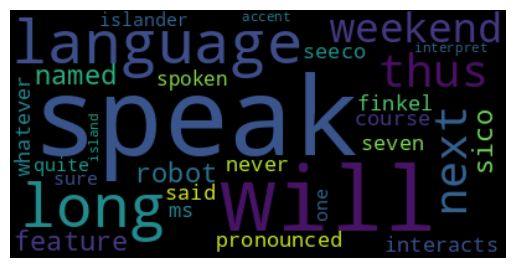

In [423]:
# Check that this will work with first paragraph ONLY:
texttest = df.Paragraph[0]

# Create and generate a word cloud image:
wc = WordCloud().generate(texttest)

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

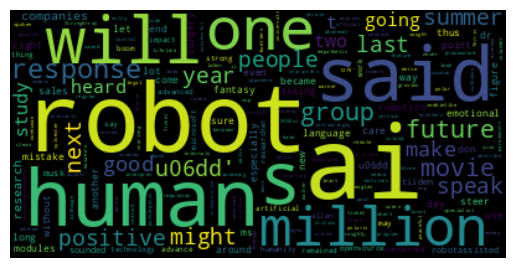

In [425]:
# try cloud with all paragraphs:

# Create and generate a word cloud image:
wc = WordCloud().generate(str(text))

# Display the generated image:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

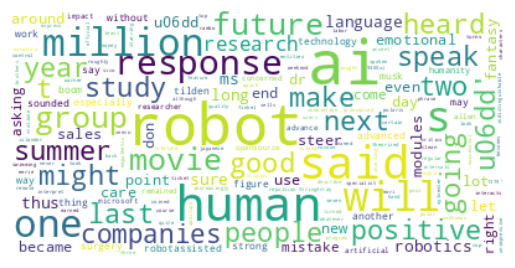

In [426]:
# Try to adjust max_font_size, change the maximum number of word and background color:
wordcloud = WordCloud(max_font_size=50, max_words=2000, background_color="white").generate(str(text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

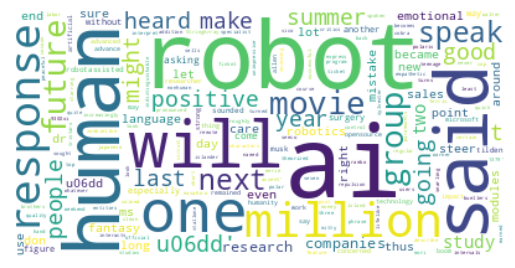

In [427]:
# test usage of a stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["paragraph", "Although", 'Swimmin', 'actually', 'la', 'tr', 'co', 'ca', 'Er', 'e', 's', 'Rus'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


# Align Word Cloud Into a Shape (Mask)

## Robot Mask

In [428]:
uploaded = files.upload() # load a png file from local computer to mask text shape

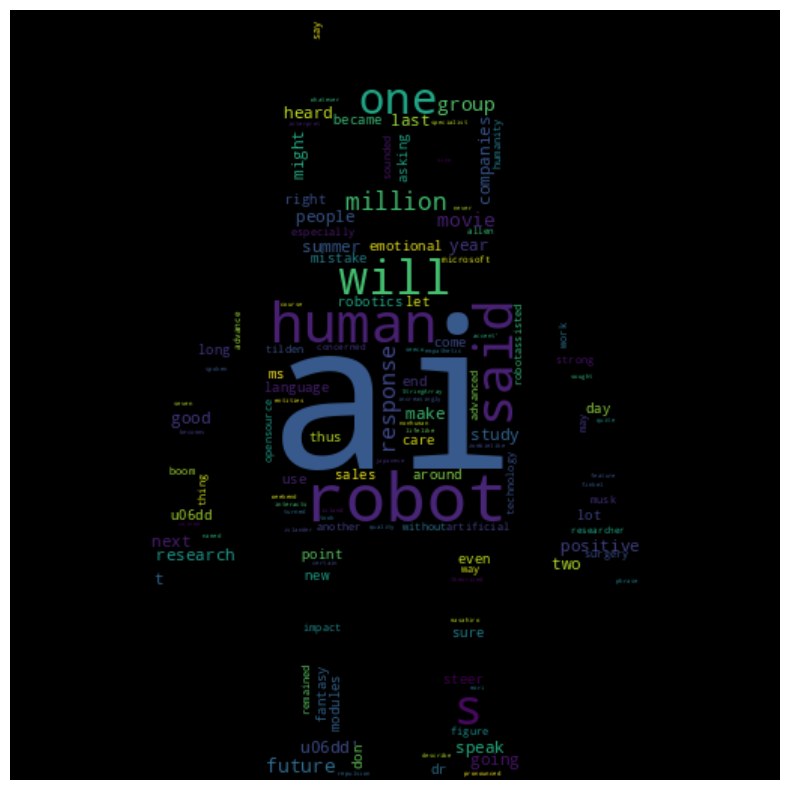

In [429]:
# create word cloud in a robot shape
mask = np.array(Image.open('robotedit.jpg'))
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="black",
               max_words=500, max_font_size=256,
              #  width=1200, height=1200,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(str(text))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

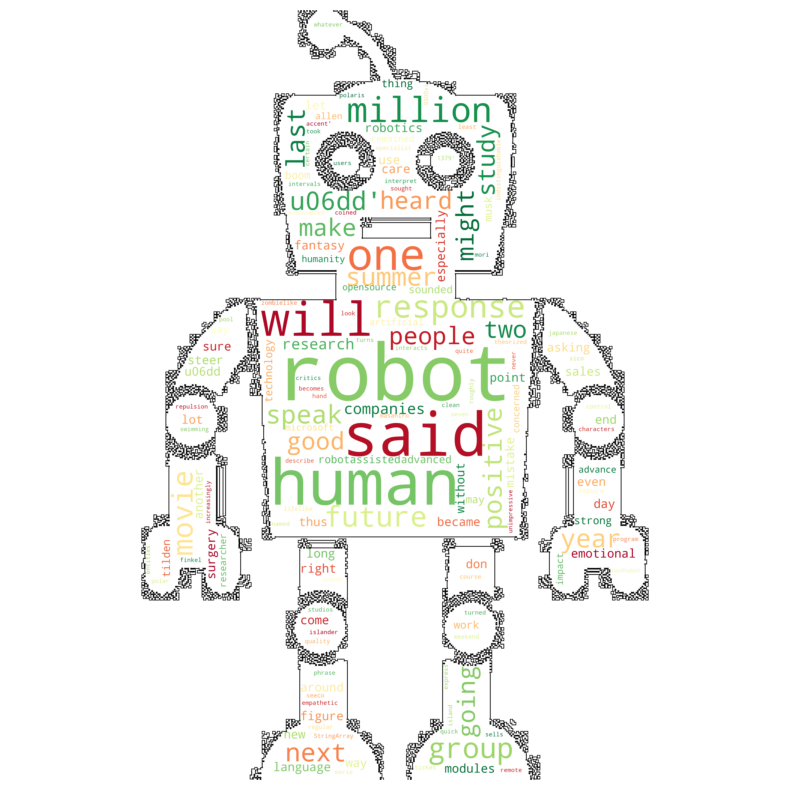

In [430]:
# create word cloud in a robot shape - poor border drawing
mask = np.array(Image.open('robotedit.jpg'))
wc = WordCloud(scale=10,
                      max_words=150,
                      colormap='RdYlGn',
                      mask=mask,
                      background_color='White',
                      stopwords=stopwords,
                      include_numbers=False,
                      min_word_length=3,
                      normalize_plurals=True,
                      collocations=True,
                      contour_color='Black',
                      contour_width=1)
wc.generate(str(text))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Computer Mask

In [431]:
uploaded = files.upload() # load a png file from local computer to mask text shape

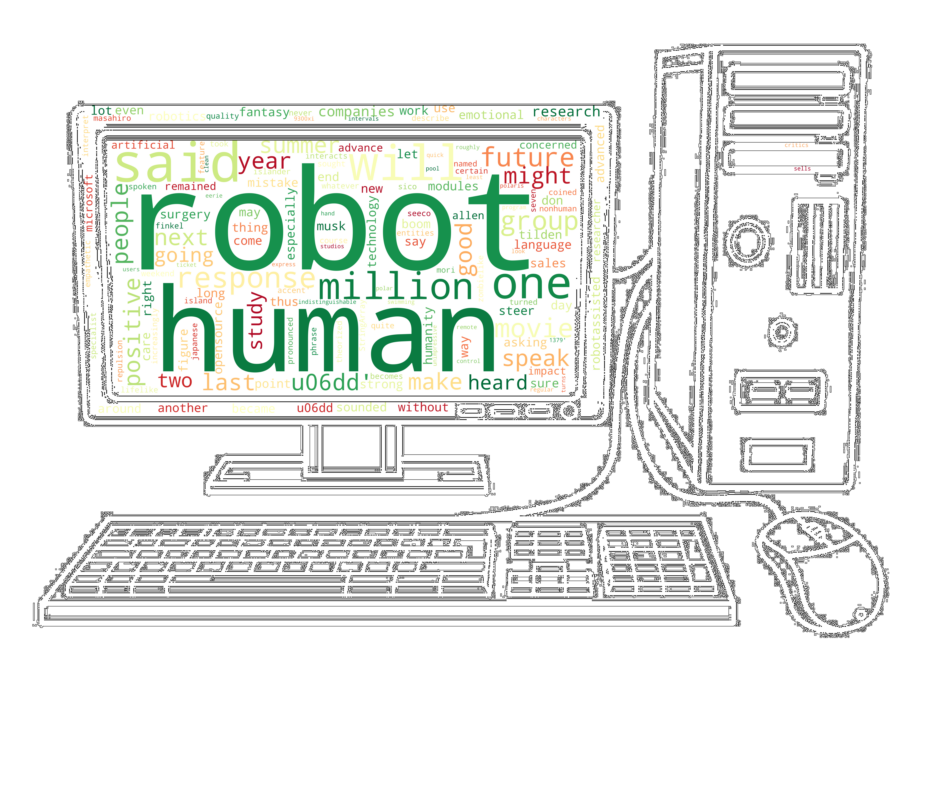

In [432]:

mask = np.array(Image.open('computer.jpg'))
wc = WordCloud(scale=10,
                      max_words=150,
                      colormap='RdYlGn',
                      mask=mask,
                      background_color='White',
                      stopwords=stopwords,
                      include_numbers=False,
                      min_word_length=3,
                      normalize_plurals=True,
                      collocations=True,
                      contour_color='Black',
                      contour_width=1)
wc.generate(str(text))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## Chip Mask

In [433]:
uploaded = files.upload() # load a png file from local computer to mask text shape

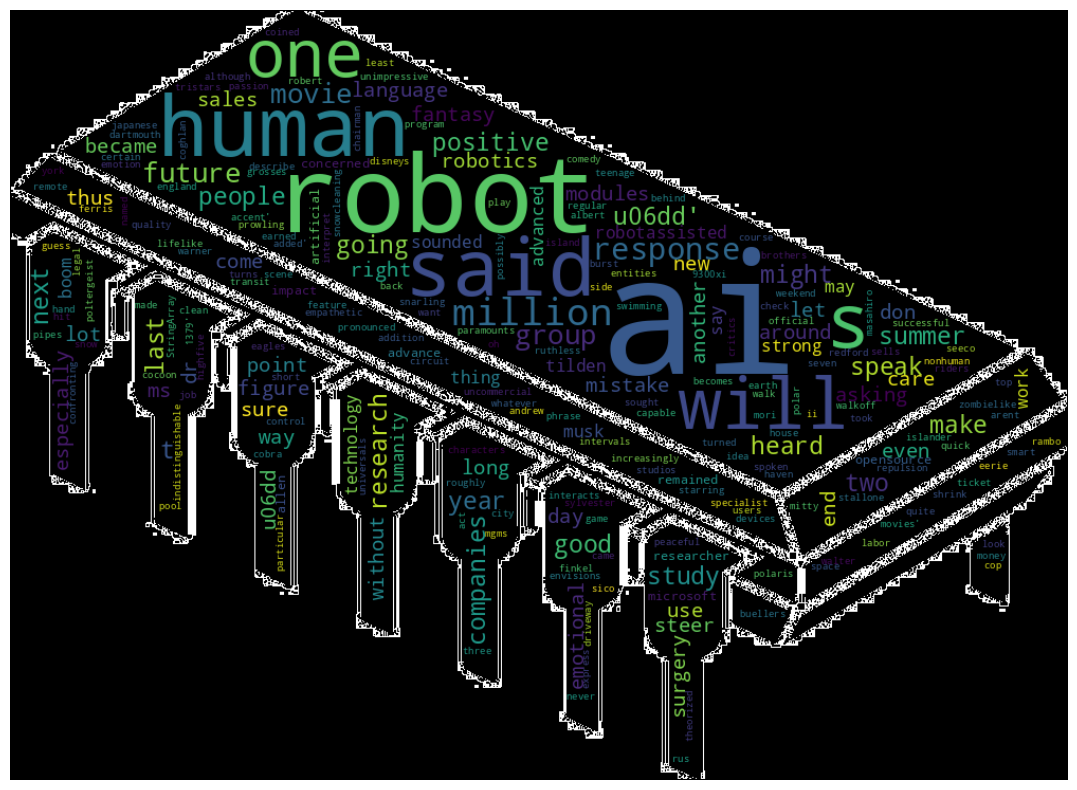

In [434]:
# Try to shape the Word Cloud into a MicroChip
mask = np.array(Image.open('chip.jpg'))
wc = WordCloud(stopwords=STOPWORDS,
               mask=mask, background_color="black",
               max_words=250, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0],
               contour_color='white',
                      contour_width=1)
wc.generate(str(text))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

## AI Mask

In [435]:
uploaded = files.upload() # load a png file from local computer to mask text shape

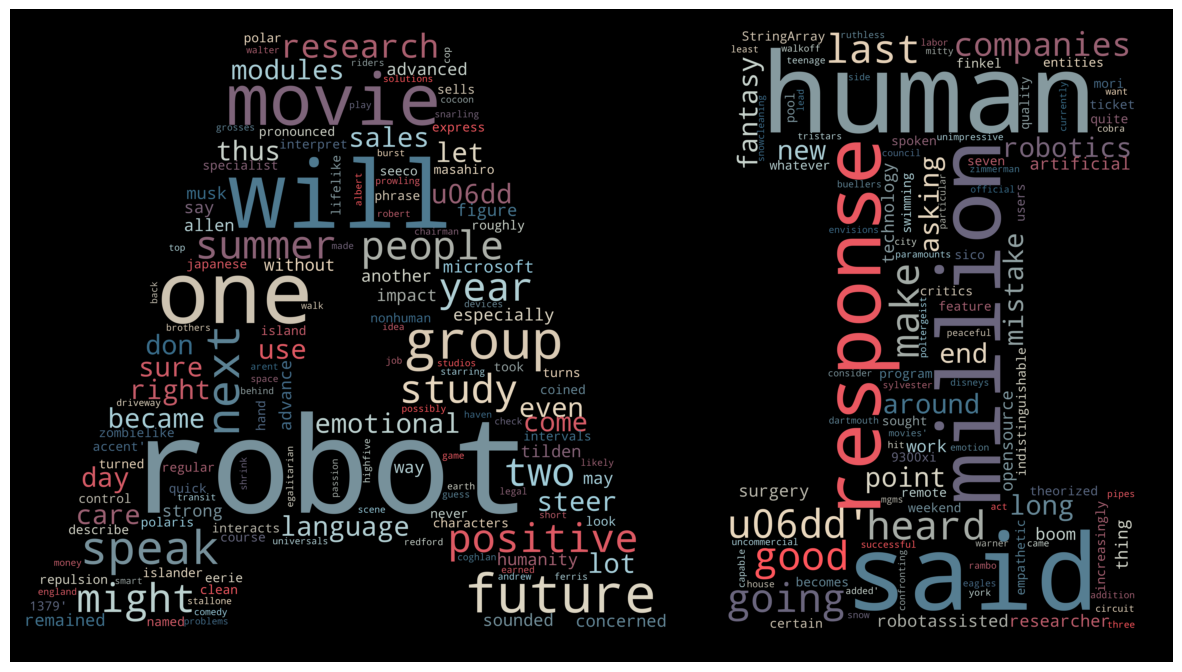

In [436]:
# Try to Shape the Word Cloud into the Letter "AI" - Black Background
mask = np.array(Image.open('AI.jpg'))
wc = WordCloud(scale=10,
                      max_words=250,
                      colormap=grape_team_colormap_test,
                      mask=mask,
                      background_color='Black',
                      stopwords=stopwords,
                      include_numbers=False,
                      min_word_length=3,
                      normalize_plurals=True,
                      collocations=True,
                      # contour_color='white',
                      #contour_width=1
               )
wc.generate(str(text))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()




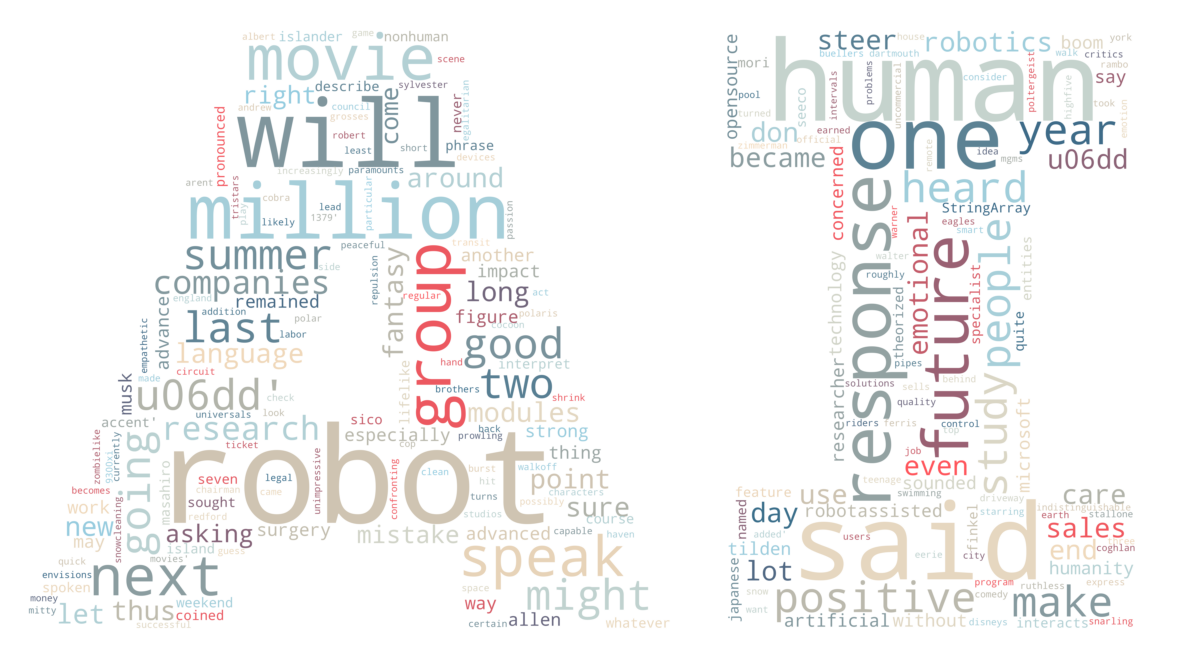

In [437]:
# Try to Shape the Word Cloud into the Letter "AI" - White Background
mask = np.array(Image.open('AI.jpg'))
wc = WordCloud(scale=10,
                      max_words=250,
                      colormap=grape_team_colormap_test,
                      mask=mask,
                      background_color='White',
                      stopwords=stopwords,
                      include_numbers=False,
                      min_word_length=3,
                      normalize_plurals=True,
                      collocations=True#,
                      # contour_color='white',
                      #contour_width=1
               )
wc.generate(str(text))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# Final Visualization

## Create Final Visualization

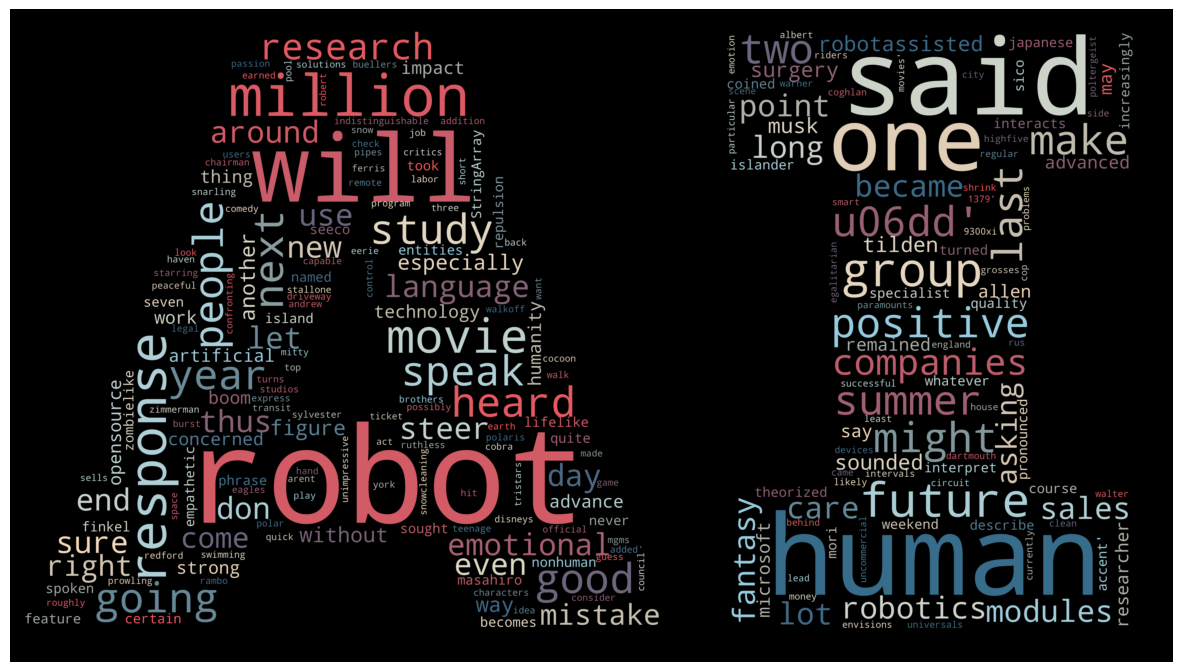

In [439]:
# Create the final visualization
text = df['Paragraph'].values # creates the text used to create our map, this uses all of the unqiue rows from the Paragraph column
stopwords = set(STOPWORDS)
stopwords.update(["paragraph", "although", 'swimmin', 'actually', 'u06dd'])
mask = np.array(Image.open('AI.jpg')) # creates a mask (shape) based on an image that will be the cloud shape
wc = WordCloud(scale=10,
               max_words=250, # Set the limit for the most words that will display
               colormap=grape_team_colormap_test, # This uses the style guide we are developing for our team
               mask=mask, # This shapes the Word Cloud into the shape set above on the mask = line above
               background_color='Black', # Sets the background color
               stopwords=stopwords, # filters out our created stopwords list
               include_numbers=False,
               min_word_length=3, # filters our words with less than 3 letters
               normalize_plurals=True, # replaces instances of duplicates with an S as the only difference
               collocations=True,
               # contour_color='white', # can be used to outline the mask
               #contour_width=1 # sets the thickness of the mask outline border
               )
wc.generate(str(text)) # create the word cloud
plt.figure(figsize=(15,10)) # set the size of the word cloud
plt.imshow(wc, interpolation="bilinear")
plt.axis('off') # do not show the axis of the graph
plt.show() # display the graph/word cloud

## Export Final Visualization as a PNG file for publication

In [443]:
# Save the image in the img folder:
wc.to_file("word_cloud.png")